In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns',50)

In [3]:
df_train=pd.read_csv('flight_train.csv')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#dependable variable
df_train.iloc[:,-1].dropna()

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
len(df_train)

10683

In [7]:
df_train.dropna(inplace=True)#dropping na values

In [8]:
copy_df_train=df_train.select_dtypes(include=['object']).copy()# taking only categorical values for EDA

In [9]:
copy_df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [10]:
copy_df_train.isnull().values.sum() #checking wheter it has null value or not ,as you can see there is no nulll value

0

In [11]:
airline_count=copy_df_train['Airline'].value_counts(sort=True)
airline_count

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

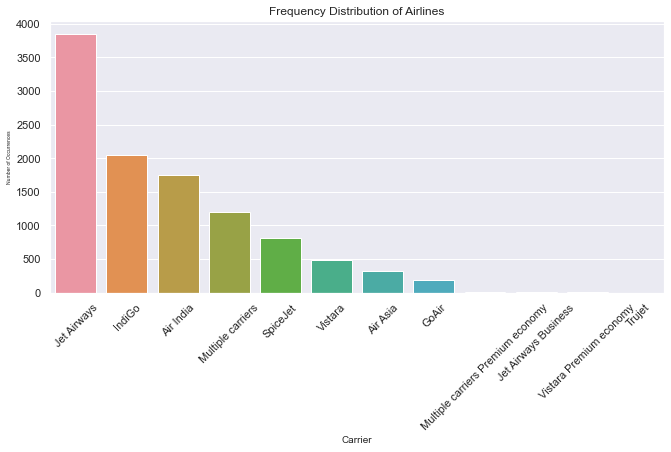

In [12]:
plt.figure(figsize=(11,5))
sns.set(style="darkgrid")
sns.barplot(x=airline_count.index, y=airline_count.values,data=copy_df_train)
plt.title('Frequency Distribution of Airlines')
plt.ylabel('Number of Occurrences', fontsize=5)
plt.xticks(rotation=45)
plt.xlabel('Carrier', fontsize=10)
plt.show()

In [13]:
#It is Better to convert object(if it is categorical) into category dtype as it consume less memory 
copy_df_train=copy_df_train[copy_df_train.columns].astype('category')

In [14]:
copy_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10682 non-null  category
 1   Date_of_Journey  10682 non-null  category
 2   Source           10682 non-null  category
 3   Destination      10682 non-null  category
 4   Route            10682 non-null  category
 5   Dep_Time         10682 non-null  category
 6   Arrival_Time     10682 non-null  category
 7   Duration         10682 non-null  category
 8   Total_Stops      10682 non-null  category
 9   Additional_Info  10682 non-null  category
dtypes: category(10)
memory usage: 313.6 KB


In [15]:
air_encod=pd.get_dummies(copy_df_train['Airline'],prefix='Airline')

In [16]:
copy_df_train=pd.concat([copy_df_train,air_encod],axis=1)

In [17]:
copy_df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,0,0,0,1,0,0,0,0,0,0,0,0


In [18]:
#Extracting only day
copy_df_train['Day_of_Journey']=copy_df_train['Date_of_Journey'].apply(lambda x:int(x.split('/')[0])) 

In [19]:
#Extrxting only month
copy_df_train['Month_of_Journey']=copy_df_train['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))

In [20]:
#Encoding source 
source_encod=pd.get_dummies(copy_df_train['Source'],prefix='Source')

In [21]:
#Encoding destiantion
dest_endod=pd.get_dummies(copy_df_train['Destination'],prefix='Dest')

In [22]:
#concatenating all the three
copy_df_train=pd.concat([copy_df_train,source_encod,dest_endod],axis=1)

In [23]:
#taking only hour of departure time
copy_df_train['Dep_hour']=copy_df_train['Dep_Time'].apply(lambda x:int(x.split(':')[0]))

In [24]:
#taking only minute of departure time
copy_df_train['Dep_min']=copy_df_train['Dep_Time'].apply(lambda x:int(x.split(':')[1]))   

In [25]:
#taking only hour of arrival time
copy_df_train['Arr_hour']=copy_df_train['Arrival_Time'].apply(lambda x:int(x.split(':')[0]))

In [26]:
#taking only minute of arrival time
copy_df_train['Arr_min']=pd.to_datetime(copy_df_train.Arrival_Time).dt.minute

In [27]:
#taking only hour from duration if the hour has no value then assigning it 0 so that it will balance the row value
copy_df_train['Duration_Hour']=copy_df_train['Duration'].apply(lambda x:int(x.split('h')[0] if re.search('\d[2]*h',x) else 0))

In [28]:
#taking only minute from duration if the minute has no value then assigning it 0 so that it can cope with df
copy_df_train['Duration_Minute']=copy_df_train['Duration'].apply(lambda x:x.split(' ')[-1] if re.search('\d[2]*m',x) else '0m')

In [29]:
#selecting only minulte value
copy_df_train['Duration_Minute']=copy_df_train['Duration_Minute'].apply(lambda x:int(x.split('m')[0]))

In [30]:
#checking unique value in stoppage
set(copy_df_train['Total_Stops'])

{'1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'}

In [31]:
#replacing stoppage a/c to their value 
stop={'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0}
copy_df_train['Total_Stops'].replace(stop,inplace=True)

In [32]:
copy_df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Day_of_Journey,Month_of_Journey,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,0,0,0,1,0,0,0,0,0,0,0,0,24,3,1,0,0,0,0,0,0,0,0,0,1,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,1,0,1,0,0,0,0,0,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,0,0,0,0,1,0,0,0,0,0,0,0,9,6,0,0,1,0,0,0,1,0,0,0,0,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,0,0,0,1,0,0,0,0,0,0,0,0,12,5,0,0,0,1,0,1,0,0,0,0,0,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,16,50,21,35,4,45


In [33]:
#dropping tables as we have already preprocess the data
copy_df_train.drop(['Airline','Date_of_Journey', 'Airline_Trujet','Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration','Additional_Info','Dest_Delhi'],axis=1,inplace=True)

In [34]:
copy_df_train.head(5)

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Day_of_Journey,Month_of_Journey,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hour,Duration_Minute
0,0,0,0,0,1,0,0,0,0,0,0,0,24,3,1,0,0,0,0,0,0,0,0,1,22,20,1,10,2,50
1,2,0,1,0,0,0,0,0,0,0,0,0,1,5,0,0,0,1,0,1,0,0,0,0,5,50,13,15,7,25
2,2,0,0,0,0,1,0,0,0,0,0,0,9,6,0,0,1,0,0,0,1,0,0,0,9,25,4,25,19,0
3,1,0,0,0,1,0,0,0,0,0,0,0,12,5,0,0,0,1,0,1,0,0,0,0,18,5,23,30,5,25
4,1,0,0,0,1,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,16,50,21,35,4,45


In [35]:
len(copy_df_train.columns)

30

In [36]:
print('.............. Preprocessing of test data has started! ................')

.............. Preprocessing of test data has started! ................


In [37]:
df_test=pd.read_csv('flight_test.csv')
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [39]:
len(df_test)

2671

In [40]:
df_test.dropna(inplace=True)#dropping na values

In [41]:
copy_df_test=df_test.copy()

In [42]:
copy_df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [43]:
#It is Better to convert object(if it is categorical) into category dtype as it consume less memory 
copy_df_test=copy_df_test[copy_df_test.columns].astype('category')

In [44]:
#Encoding airlines
air_encod=pd.get_dummies(copy_df_test['Airline'],prefix='Airline')

In [45]:
copy_df_test=pd.concat([copy_df_test,air_encod],axis=1)

In [46]:
copy_df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,0,1,0,0,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,0,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,0,0,0,0,0,0,0,0


In [47]:
#Extracting only day
copy_df_test['Day_of_Journey']=copy_df_test['Date_of_Journey'].apply(lambda x:int(x.split('/')[0])) 

In [48]:
#Extracting only day
copy_df_test['Month_of_Journey']=copy_df_test['Date_of_Journey'].apply(lambda x:int(x.split('/')[1])) 

In [49]:
#Encoding source
source_encod=pd.get_dummies(copy_df_test['Source'],prefix='Source')

In [50]:
#Encoding destiantion
dest_encod=pd.get_dummies(copy_df_test['Destination'],prefix='Dest')

In [51]:
#concatenating all the three
copy_df_test=pd.concat([copy_df_test,source_encod,dest_encod],axis=1)

In [52]:
#taking only hour of departure time
copy_df_test['Dep_hour']=copy_df_test['Dep_Time'].apply(lambda x:int(x.split(':')[0]))

In [53]:
#taking only minute of departure time
copy_df_test['Dep_min']=copy_df_test['Dep_Time'].apply(lambda x:int(x.split(':')[1]))   

In [54]:
#taking only hour of arrival time
copy_df_test['Arr_hour']=copy_df_test['Arrival_Time'].apply(lambda x:int(x.split(':')[0]))

In [55]:
#taking only minute of arrival time
copy_df_test['Arr_min']=pd.to_datetime(copy_df_test.Arrival_Time).dt.minute


In [56]:
#taking only hour from duration if the hour has no value then assigning it 0 so that it can balanced the df

copy_df_test['Duration_Hour']=copy_df_test['Duration'].apply(lambda x:int(x.split('h')[0] if re.search('\d[2]*h',x) else 0))

In [57]:
#taking only minute from duration if the minute has no value then assigning it 0 so that it can cope with df

copy_df_test['Duration_Minute']=copy_df_test['Duration'].apply(lambda x:x.split(' ')[-1] if re.search('\d[2]*m',x) else '0m')


In [58]:
copy_df_test['Duration_Minute']=copy_df_test['Duration_Minute'].apply(lambda x:int(x.split('m')[0]))

In [59]:
#checking unique value in stoppage
set(copy_df_test['Total_Stops'])

{'1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'}

In [60]:
#replacing stoppage a/c to their value 
stop={'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0}
copy_df_test['Total_Stops'].replace(stop,inplace=True)

In [61]:
copy_df_test.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Day_of_Journey,Month_of_Journey,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hour,Duration_Minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,0,0,0,0,1,0,0,0,0,0,0,6,6,0,0,1,0,0,0,1,0,0,0,0,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,0,0,0,1,0,0,0,0,0,0,0,12,5,0,0,0,1,0,1,0,0,0,0,0,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,0,0,0,0,1,0,0,0,0,0,0,21,5,0,0,1,0,0,0,1,0,0,0,0,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,0,0,0,0,0,0,1,0,0,0,0,21,5,0,0,1,0,0,0,1,0,0,0,0,8,0,21,0,13,0


In [62]:
copy_df_test.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration','Additional_Info','Dest_Delhi'],axis=1,inplace=True)

In [63]:
copy_df_test.head(2)

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Day_of_Journey,Month_of_Journey,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Banglore,Dest_Cochin,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hour,Duration_Minute
0,1,0,0,0,0,1,0,0,0,0,0,0,6,6,0,0,1,0,0,0,1,0,0,0,17,30,4,25,10,55
1,1,0,0,0,1,0,0,0,0,0,0,0,12,5,0,0,0,1,0,1,0,0,0,0,6,20,10,20,4,0


In [64]:
len(copy_df_test.columns)

30

In [65]:
print(copy_df_train.columns)

Index(['Total_Stops', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Day_of_Journey',
       'Month_of_Journey', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Banglore', 'Dest_Cochin',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')


In [66]:
print(copy_df_test.columns)

Index(['Total_Stops', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Day_of_Journey',
       'Month_of_Journey', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Banglore', 'Dest_Cochin',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')


In [67]:
len(copy_df_train.columns)

30

In [68]:
X=copy_df_train #independent variable

In [69]:
Y=df_train.iloc[:,-1] #dependent variable

# Data Preprocessing

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [72]:
len(X_train)

8011

# Model Trainning

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
model=RandomForestRegressor() #Intantiaiting Random forest regressor

In [75]:
model.fit(X_train,y_train) #fitting the model

RandomForestRegressor()

In [76]:
y_predict=model.predict(X_test) 
y_predict#predicting values based on existing data

array([16848.82,  5508.3 ,  8956.58, ...,  3501.86,  6199.6 ,  6852.26])

In [77]:
print('Accuracy in existing data is {}%'.format(round(model.score(X_test,y_test)*100)))

Accuracy in existing data is 80%


Text(0, 0.5, 'predicted price from model')

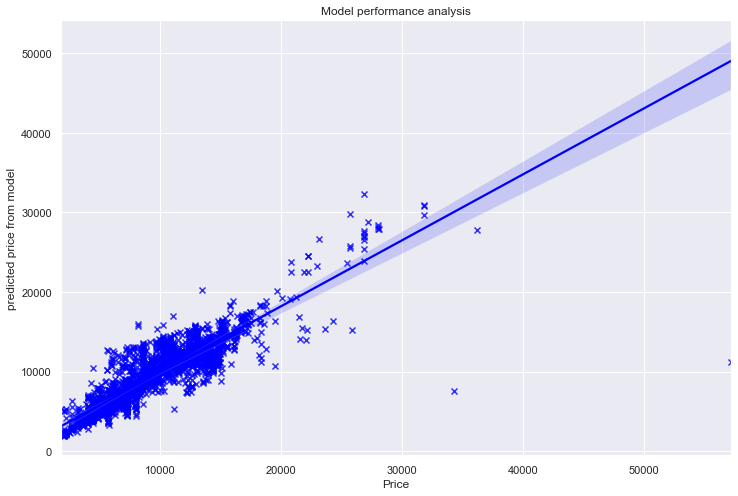

In [78]:
plt.figure(figsize = (12,8))
sns.regplot(x=y_test,y=y_predict,color='blue',marker='x')
plt.title('Model performance analysis')
plt.ylabel('predicted price from model')

In [79]:
model_score=mean_squared_error(y_test,y_predict)
model_score

4089342.9112080233

In [80]:
# dumping information to inside the file
pickle.dump(model, open('flight_predict.pkl', 'wb'))